<a href="https://colab.research.google.com/github/AsadNaeem361/myapp-heroku/blob/main/Accuracy_Paradox_Credit_Card_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection Analysis

#### This project is an attempt to solve the accuracy paradox problem caused by imabalanced datasets in the credit card industry domain



## Data Declaration 

#### In this section, we will attempt to declare the data by exploring some basic statistics about our data

#### In the cell below, we import all the necessary libraries and change some settings to our preferences

In [ ]:
import pandas as pd
import timeit
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import warnings
import requests
import sklearn

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option("display.max_colwidth", None)



In [ ]:
# Read the csv file
df = pd.read_csv('https://media.githubusercontent.com/media/AsadNaeem361/myapp-heroku/main/creditcard.csv')

### In the cells below, we try to grab a feel of what our data looks like and exploring basic statistics


### df.head() returns the first 5 records in the dataset, now we can see the exact values of the features.

#### Keeping in mind the fact that the dataset is PCA transformed according to the description, we can observe that only the Time, Amount and Class features are not transformed using PCA. 


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### df.describe() gives us some basic statistics about our data

#### Now we can see alot of statistical metrics about our data like mean, standard deviation, minimum and maximum values and more for each feature


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#Number of features

len(df.columns)

31

### df.dtypes returns all the features and their data types

#### Now we can see that almost the entire 31 features are of type float

In [ ]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### Here we try to find out the number of instances of each class

In [ ]:
df.isnull().values.any()

False

In [ ]:
fraud=df[df.Class==1]
valid=df[df.Class==0]
outlier_percentage=(df.Class.value_counts()[1]/df.Class.value_counts()[0])*100

In [ ]:
print('Fraudulent transactions are: %.3f%%'%outlier_percentage)
print('Fraud Cases: ',len(fraud))
print('Valid Cases: ',len(valid))

Fraudulent transactions are: 0.173%
Fraud Cases:  492
Valid Cases:  284315


([<matplotlib.patches.Wedge at 0x2636b2d1610>,
 [Text(1.0999838009225849, 0.005969732649226358, 'fraud cases 492'),
  Text(-2.099969073634098, -0.011396919774580815, 'valid cases 284315')])

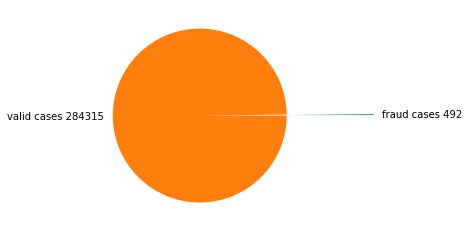

In [ ]:
plt.pie([len(fraud), len(valid)], labels=['fraud cases '+str(len(fraud)), 'valid cases '+str(len(valid))], explode=[0, 1])

#### We can observe that there is a huge discrepancy between the number of instances in both classes. This mean that there is a heavy imbalance. Only 0.173% of all transactions are fraudulent

#### There are no null values in the dataset

In [ ]:
fig = px.scatter_matrix(df,width=3000, height=3000)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",)
fig.show()

### Below are the boxplots of the features of the dataset

#### Boxplots can assist us in detecting outliers

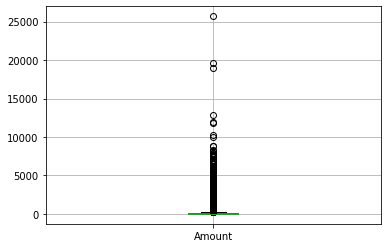

In [ ]:
df1 = df[['Amount']].copy()
df1.boxplot()

<AxesSubplot:>

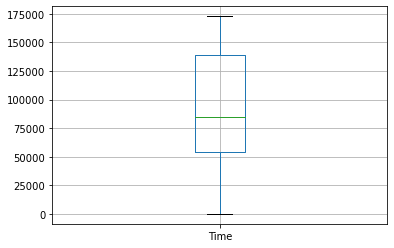

In [ ]:
df1 = df[['Time']].copy()
df1.boxplot()

<AxesSubplot:>

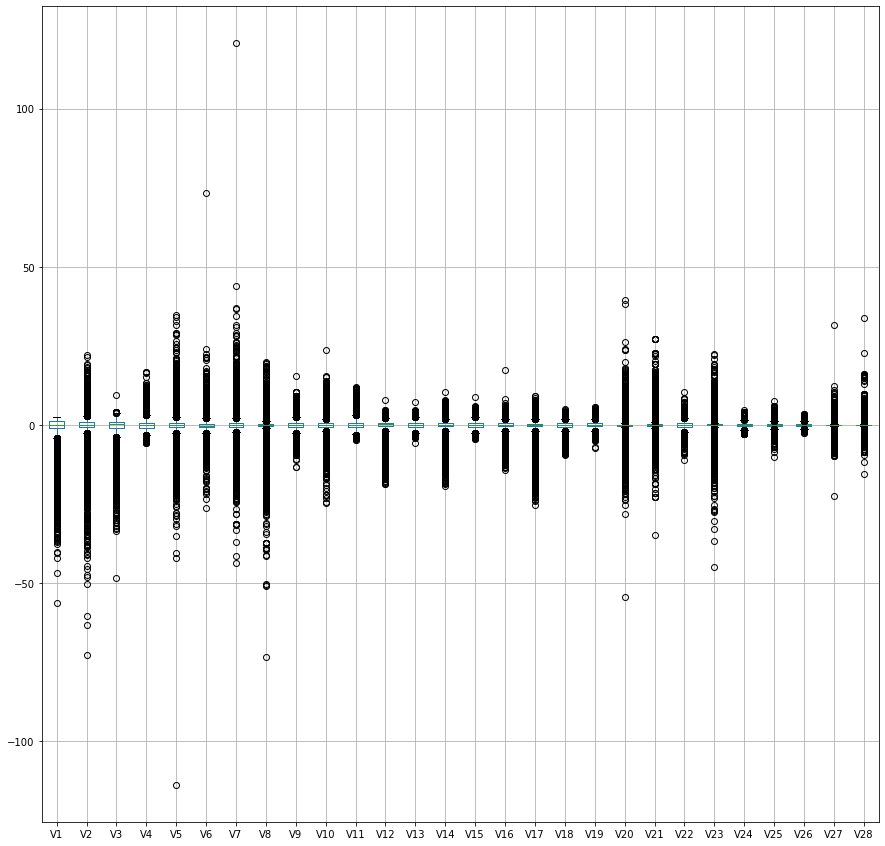

In [ ]:
df1 = df.loc[:, ~df.columns.isin(['Amount', 'Time', 'Class'])]
df1.boxplot(figsize=(15,15))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.covariance import EllipticEnvelope

#### We can observe that most of the data falls out of the Inter quartile range for a respective feature. Thus, we can conclude that there are alot of outliers in the data. We should keep this into consideration when we are pre-processing our data.

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

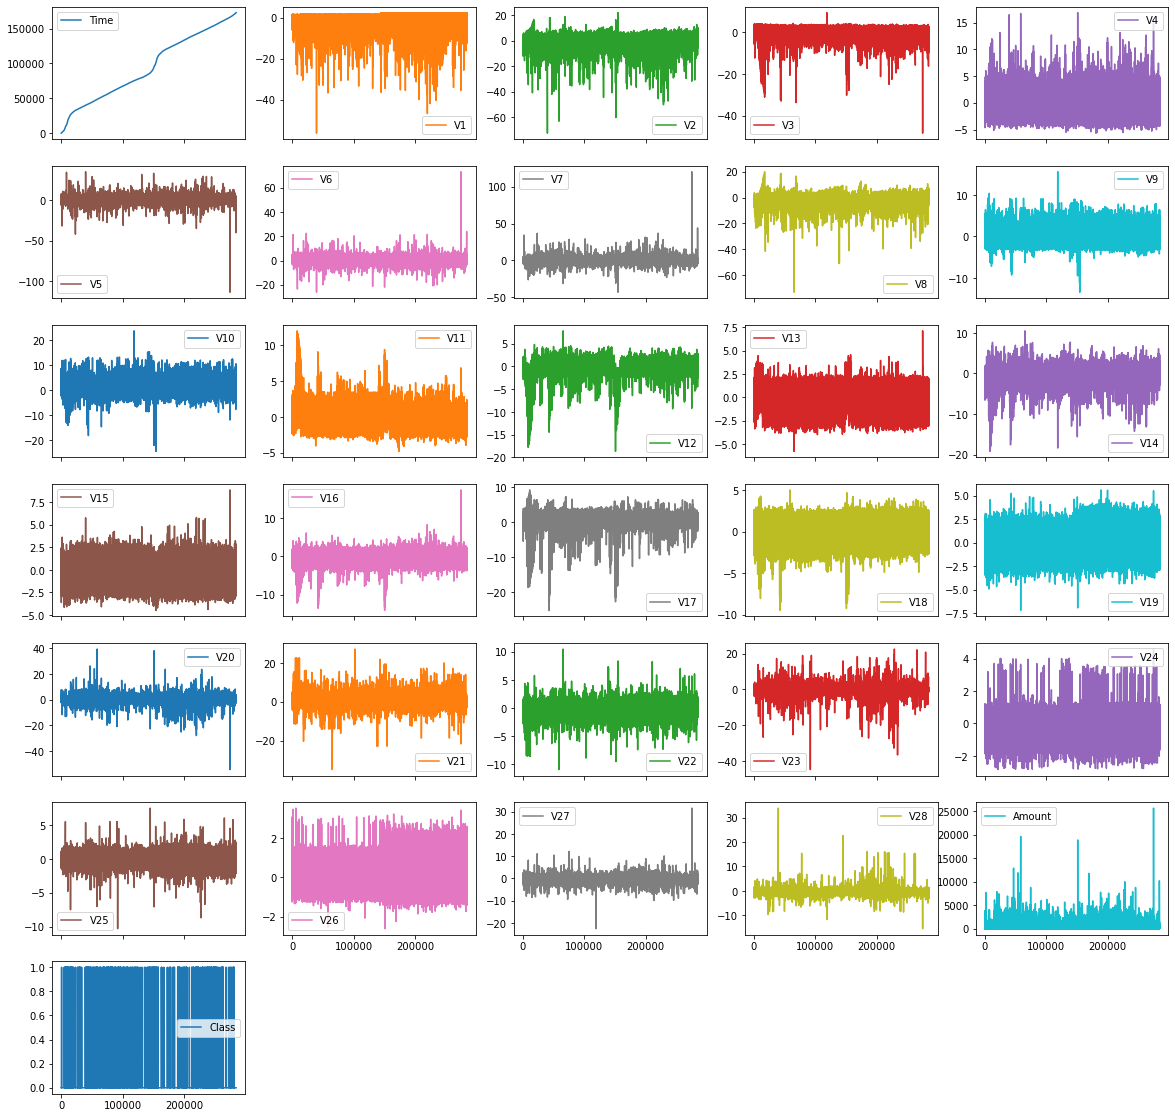

In [ ]:
df.plot(subplots=True, layout=(7,5), figsize=(20,20))

### Below are the histogram plots for each feature

#### Histograms can assit us in determining the distribution of the data

array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>],
       [<AxesSubplot:title={'center':'V5'}>,
        <AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>],
       [<AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>,
        <AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>],
       [<AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>,
        <AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>],
       [<AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'

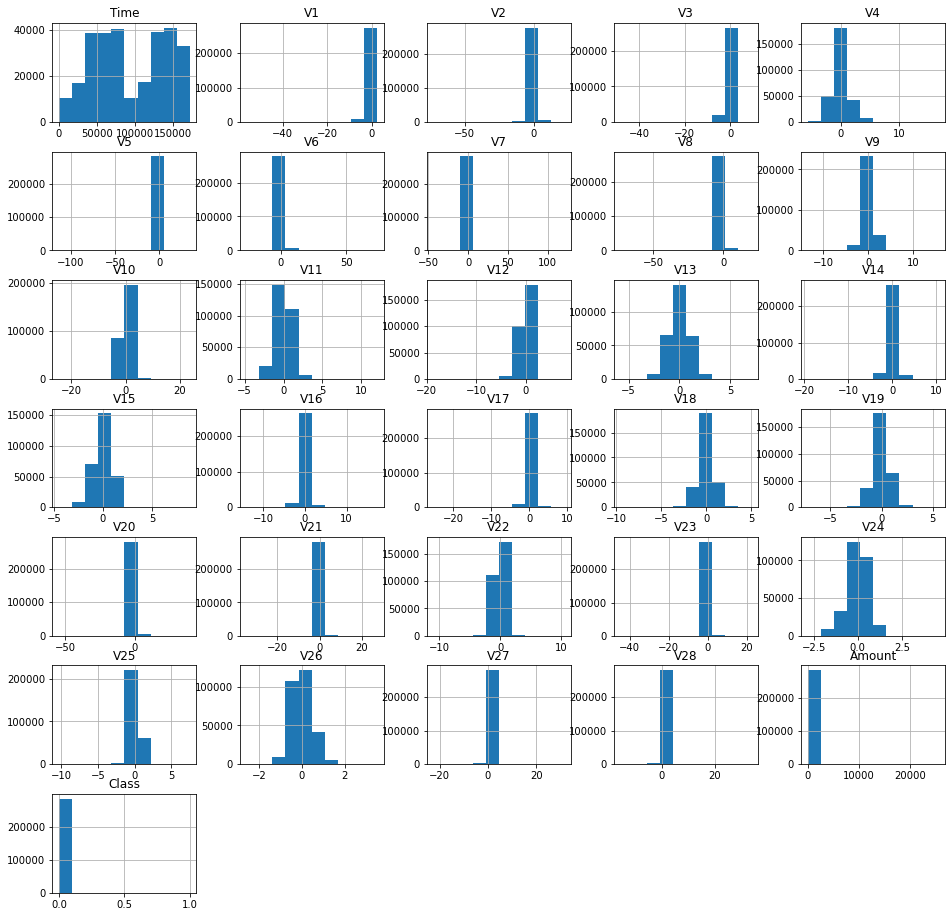

In [ ]:
df.hist(column=df.columns, figsize=(16,16), layout=(7,5))

In [ ]:
# segment records by class, 492 records of each class
fraudRecs = df.loc[df['Class'] == 1]
validRecs = df.loc[df['Class'] == 0]
validRecs = validRecs.sample(n = 492)
SampledData = pd.concat([fraudRecs, validRecs])
len(SampledData)

984

#### Why did you Sampled records to make both classes equal in instances and then plot the correlation matrix?

In [ ]:
SampledData.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.224237,-0.212681,0.140706,-0.190697,0.271708,0.067311,0.201170,-0.146120,0.136672,0.192222,-0.290956,0.241952,-0.094129,0.156012,-0.190294,0.229009,0.225499,0.243408,-0.080230,-0.012228,-0.054136,0.139611,0.072072,-0.004522,-0.198940,-0.053633,-0.142036,-0.004456,0.023131,-0.111578
V1,0.224237,1.000000,-0.784398,0.883304,-0.617298,0.848871,0.320998,0.887118,-0.076174,0.659552,0.742070,-0.528819,0.591422,-0.057000,0.438583,0.144247,0.636182,0.674021,0.680654,-0.299178,-0.332567,0.018364,-0.044509,-0.049123,-0.071413,-0.077601,0.080753,0.192040,0.204450,-0.019074,-0.432583
V2,-0.212681,-0.784398,1.000000,-0.845311,0.659913,-0.788438,-0.235653,-0.827167,-0.030987,-0.677689,-0.756227,0.609723,-0.655681,0.026203,-0.559016,-0.179433,-0.617634,-0.633292,-0.609982,0.220499,0.229005,0.019504,0.020578,0.161459,0.011304,0.127767,-0.036643,-0.148116,0.045155,-0.268537,0.485912
V3,0.140706,0.883304,-0.845311,1.000000,-0.777703,0.851814,0.461561,0.888793,-0.169451,0.767434,0.858379,-0.718055,0.761903,-0.064829,0.656818,0.177522,0.729223,0.739650,0.705050,-0.322623,-0.333953,0.024746,-0.073613,-0.028893,0.003436,-0.102129,0.025089,0.104596,0.132916,0.001405,-0.570497
V4,-0.190697,-0.617298,0.659913,-0.777703,1.000000,-0.570586,-0.428781,-0.714392,0.111632,-0.799994,-0.800945,0.802662,-0.839273,0.035669,-0.802288,-0.156406,-0.727633,-0.717315,-0.651542,0.312436,0.269234,-0.009894,0.114548,0.019537,-0.071924,0.002615,0.098086,-0.009133,-0.071421,-0.005246,0.720588
V5,0.271708,0.848871,-0.788438,0.851814,-0.570586,1.000000,0.259160,0.828759,-0.202805,0.655054,0.753031,-0.526849,0.610048,-0.107620,0.426582,0.096290,0.689953,0.742273,0.738660,-0.400528,-0.275946,0.044002,-0.104791,-0.083067,-0.154867,-0.091961,0.066929,0.189377,0.148840,-0.100379,-0.363851
V6,0.067311,0.320998,-0.235653,0.461561,-0.428781,0.259160,1.000000,0.270696,-0.595570,0.364386,0.405846,-0.490611,0.496298,-0.120045,0.527738,-0.025489,0.429651,0.415226,0.360176,-0.229890,-0.094405,-0.004662,0.020717,0.346867,-0.052322,-0.147523,-0.010030,-0.178595,-0.004907,0.147626,-0.380496
V7,0.201170,0.887118,-0.827167,0.888793,-0.714392,0.828759,0.270696,1.000000,0.092590,0.760453,0.866718,-0.632079,0.710638,-0.010265,0.534780,0.210584,0.737793,0.764520,0.758295,-0.343657,-0.362411,0.048496,-0.131689,-0.097922,-0.044975,0.041486,0.053836,0.239708,0.164730,0.137450,-0.471880
V8,-0.146120,-0.076174,-0.030987,-0.169451,0.111632,-0.202805,-0.595570,0.092590,1.000000,-0.069410,-0.051626,0.184904,-0.176484,0.261030,-0.200839,0.148130,-0.181324,-0.225251,-0.184738,0.225065,-0.078336,-0.074815,0.003714,-0.434075,0.079880,0.236486,0.040596,0.298749,-0.015858,0.020018,0.069147
V9,0.136672,0.659552,-0.677689,0.767434,-0.799994,0.655054,0.364386,0.760453,-0.069410,1.000000,0.851505,-0.696348,0.756332,-0.020328,0.674212,0.163553,0.725075,0.752729,0.707692,-0.318567,-0.337645,0.156244,-0.243820,-0.055826,-0.001502,-0.015558,-0.072409,0.139784,0.144279,0.022457,-0.565360


### Here we plot a distribution plot of each feature against the class feature, the points that lie in the interesection will confuse the model in training

C:\Users\asadn\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
C:\Users\asadn\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


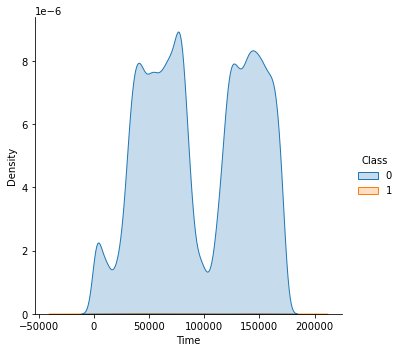

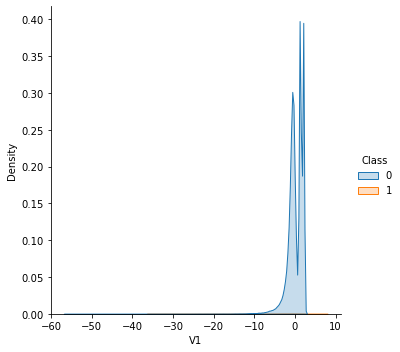

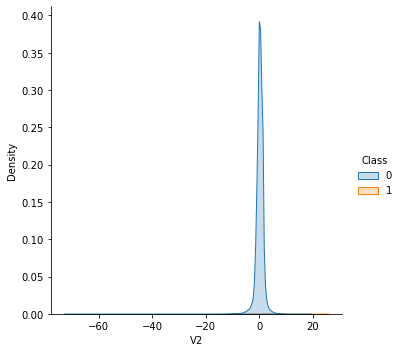

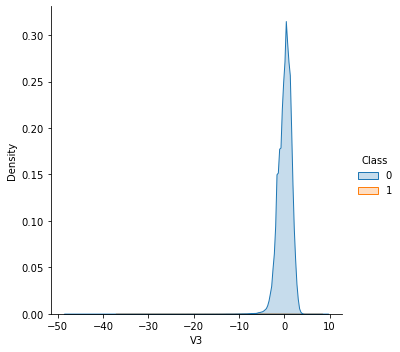

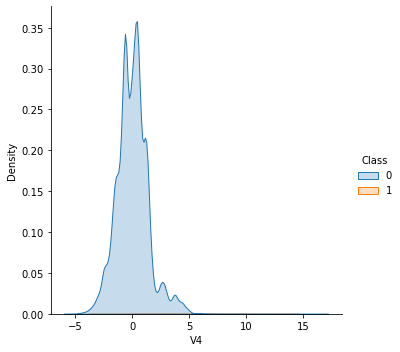

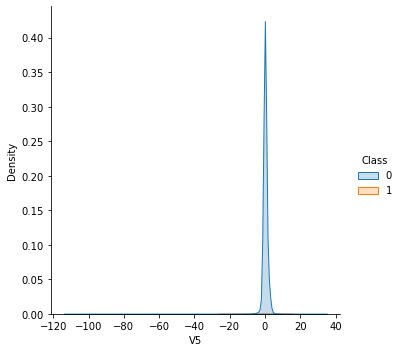

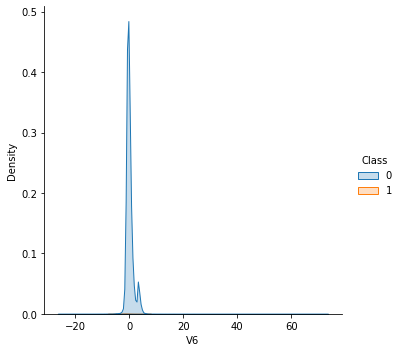

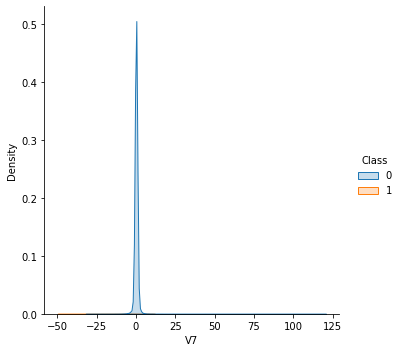

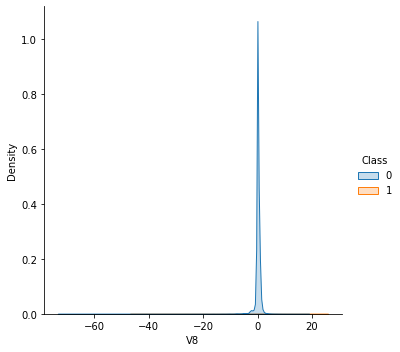

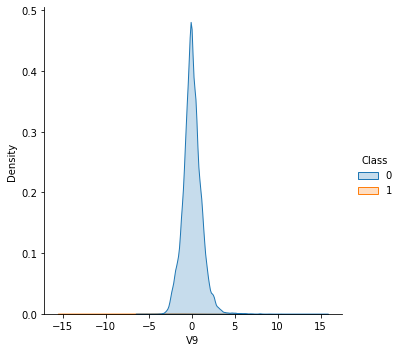

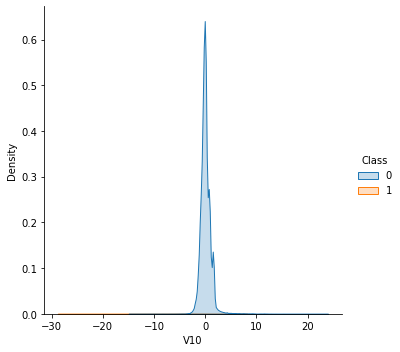

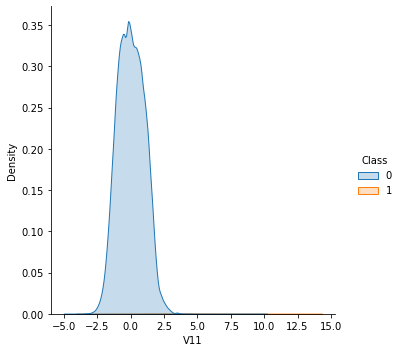

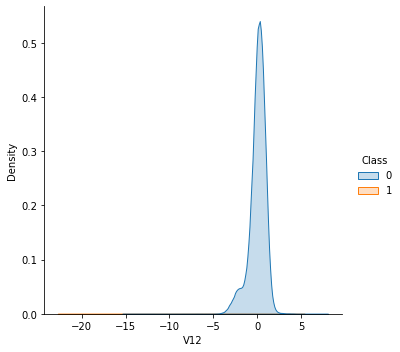

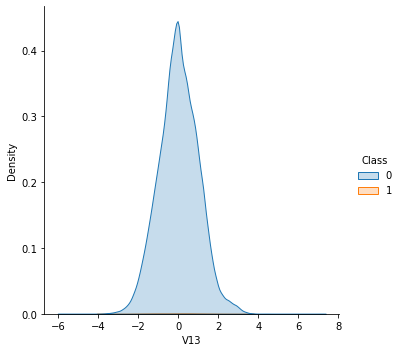

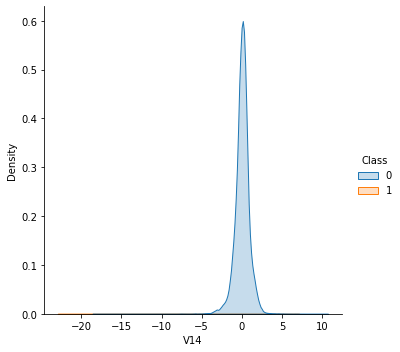

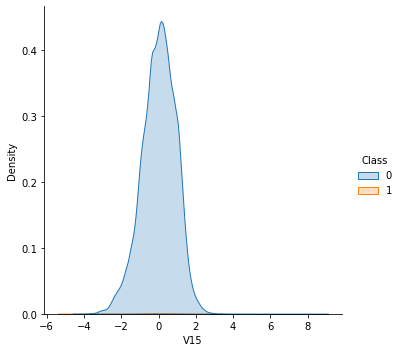

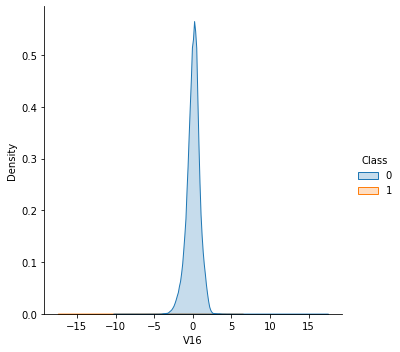

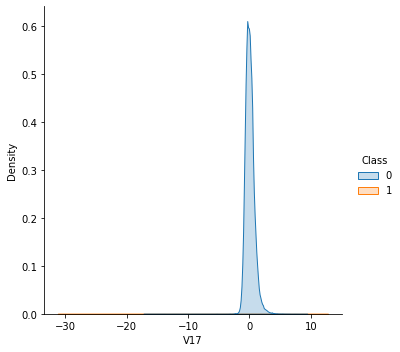

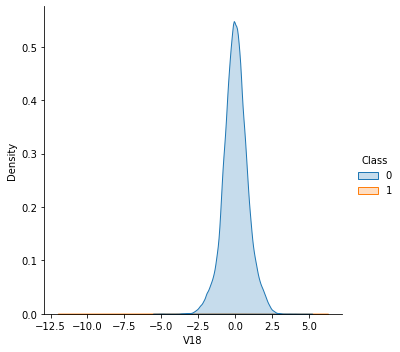

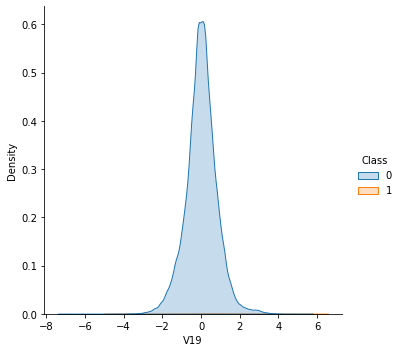

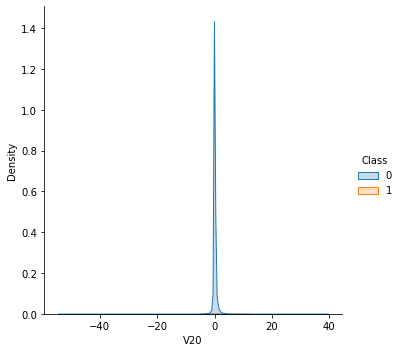

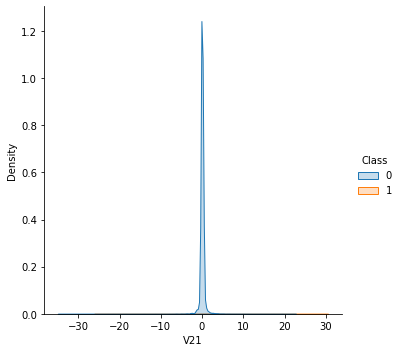

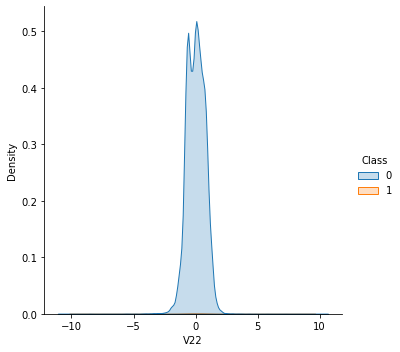

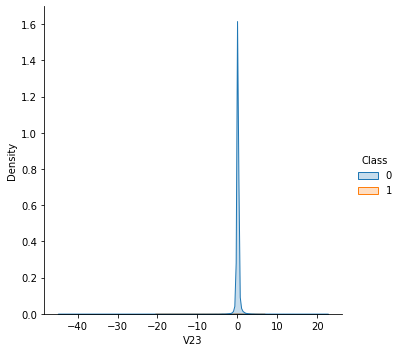

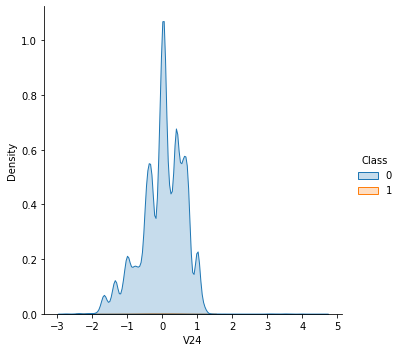

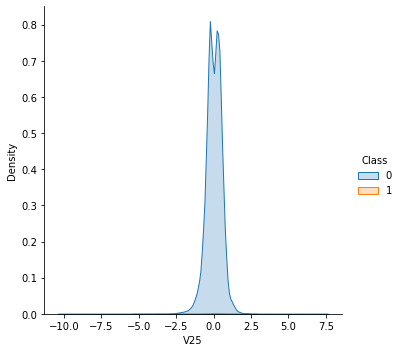

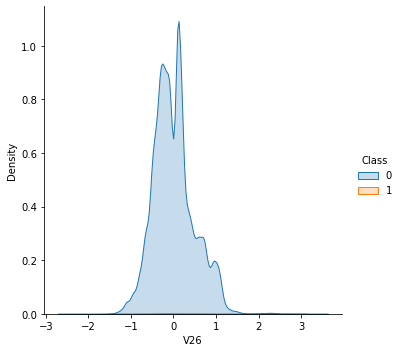

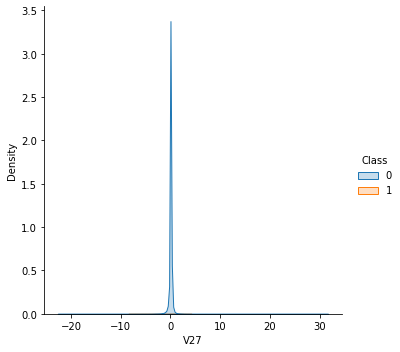

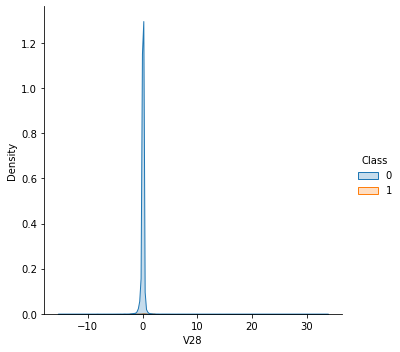

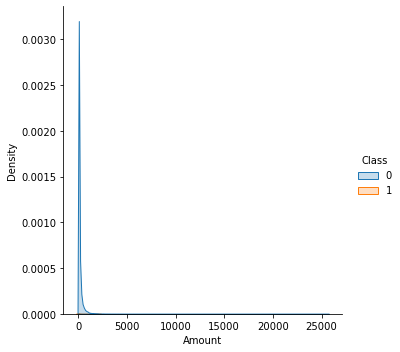

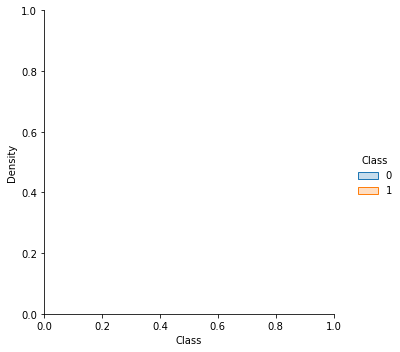

In [ ]:
for feature in df:
    sns.displot(df, x=feature, kind="kde", fill=True, hue='Class')

# Model build without sampling techniques applied 

#### As the dataset has been PCA transformed, we assume that the data has been pre scaled. However, the features 'TIme' and 'Amount' have not been scaled. We will scale them now.  

#### We will use robust scalar as it is better for data that has alot of outliers

In [ ]:
# scale columns
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

# rearrange columns
Class = df['Class']
df = df.drop(columns=['Class'])
df.insert(loc=(len(df.columns)),column='Class', value=Class)

#### Now let's consider our train test split
#### We can use simple train test split with different percentages of split. Also, we can do stratified train test splits and use different techniques 

In [ ]:
from sklearn.model_selection import train_test_split

#splitting data into input and output
data = df.values
X, y = data[:, :-1], data[:, -1]

# 67 - 33 % train - test split without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(190820, 30) (93987, 30) (190820,) (93987,)


### Now we import the relavant libraries for training our model

In [ ]:
#Import classification models and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

logreg=LogisticRegression(max_iter=1000)
svm=SVC()
knn=KNeighborsClassifier()
etree=ExtraTreesClassifier(random_state=42)
rforest=RandomForestClassifier(random_state=42)

In [ ]:
#Import performance metrics
from sklearn.metrics import  confusion_matrix,classification_report,matthews_corrcoef

#### This function helps us compute the perfromance of our model

In [ ]:
def compute_performance(model, X_train, y_train,X_test,y_test):
    start_time = timeit.default_timer()
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
    print('Accuracy: ',scores)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    print('Confusion Matrix: ')
    print(cm)
    cr=classification_report(y_test, y_pred)
    print('Classification Report: ')
    print(cr)
    mcc= matthews_corrcoef(y_test, y_pred)
    print('Matthews Correlation Coefficient: ',mcc)
    elapsed = timeit.default_timer() - start_time
    print('Execution Time for performance computation: %.2f minutes'%(elapsed/60))

#### For each algorithm mentioned, compute the performance

In [ ]:
# alg=[logreg, svm, knn, etree, rforest]
alg=[logreg, svm, knn]


for model in alg:
    compute_performance(model, X_train, y_train, X_test, y_test)
    print('---------------------------------')


Accuracy:  0.9992191591425748
Confusion Matrix: 
[[93822    17]
 [   62    86]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     93839
         1.0       0.83      0.58      0.69       148

    accuracy                           1.00     93987
   macro avg       0.92      0.79      0.84     93987
weighted avg       1.00      1.00      1.00     93987

Matthews Correlation Coefficient:  0.6961606235563509
Execution Time for performance computation: 0.44 minutes
---------------------------------
Accuracy:  0.9993344510956318
Confusion Matrix: 
[[93835     4]
 [   51    97]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     93839
         1.0       0.96      0.66      0.78       148

    accuracy                           1.00     93987
   macro avg       0.98      0.83      0.89     93987
weighted avg       1.00      1.00      1.00     